# US College outcomes project

In this project we will be focusing on basic visualisation (primarily utilising pandas and matplotlib libraries) for data on job outcomes for american university students.

The original survey data was odne via the American Community Survey.
The data was aggregated by FiveThirtyEight and realsed on github here:
https://github.com/fivethirtyeight/data/tree/master/college-majors

The Following is the data dicitonary:
Rank - Rank by median earnings (the dataset is ordered by this column).<br>
Major_code - Major code. <br>
Major - Major description.<br>
Major_category - Category of major.<br>
Total - Total number of people with major.<br>
Sample_size - Sample size (unweighted) of full-time.<br>
Men - Male graduates.<br>
Women - Female graduates.<br>
ShareWomen - Women as share of total.<br>
Employed - Number employed.<br>
Median - Median salary of full-time, year-round workers.<br>
Low_wage_jobs - Number in low-wage service jobs.<br>
Full_time - Number employed 35 hours or more.<br>
Part_time - Number employed less than 35 hours.<br>


### Research questions

We will aim to visualise the data in order to help us get an understanding of th following research questions:

Do students in more popular majors make more money?<br>
-Using scatter plots<br>

How many majors are predominantly male? Predominantly female?<br>
-Using histograms<br>

Which category of majors have the most students?<br>
-Using bar plots<br>



#### Setting up the project



In [1]:
#importing the relevant liraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# allows for printing of the matplotlib graphs in the notebook
%matplotlib inline


In [2]:
#setting up the dataframe

recent_grads = pd.read_csv('recent-grads.csv')

Inspecting the data to gain a better understanding of the contained information and its structure


In [3]:
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [4]:
recent_grads.head(5)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


The data contains infomration on college major subjects, ranked by the median wage.

In [6]:
recent_grads.shape

(173, 21)

In [7]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


We see that there a total of 173 different ranks of major subjects, however we see that there are only 172 counts in some of the other columns (such as total men and women), which indiciated that the data might need further inspection. 

In order to clean the data, and create arrays of mathicng lenght for visualisation, we will drop null rows. 

In [8]:
recent_grads = recent_grads.dropna()

In [9]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [10]:
recent_grads.shape

(172, 21)

We have removed the null row entires (where only one was found), cleaning the data set for furhter visualisation. 

## Plotting the data

In order to investigate the data, we will create scatter plots of the following pairs of data:

*Sample_size* and *Median* <br>
*Sample_size* and *Unemployment_rate*<br>
*Full_time* and *Median*<br>
*ShareWomen* and *Unemployment_rate*<br>
*Men* and *Median*<br>
*Women* and *Median*<br>

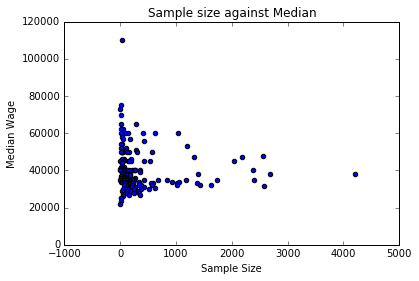

In [11]:
ax1 = recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title = 'Sample size against Median')
ax1.set_xlabel('Sample Size')
ax1.set_ylabel('Median Wage')
plt.show()

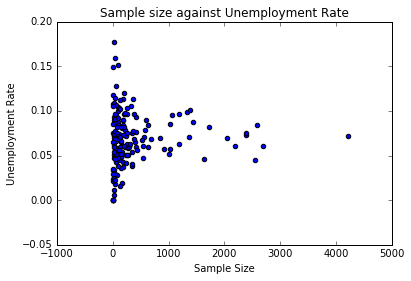

In [12]:
ax2 = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title = 'Sample size against Unemployment Rate')
ax2.set_xlabel('Sample Size')
ax2.set_ylabel('Unemployment Rate')
plt.show()

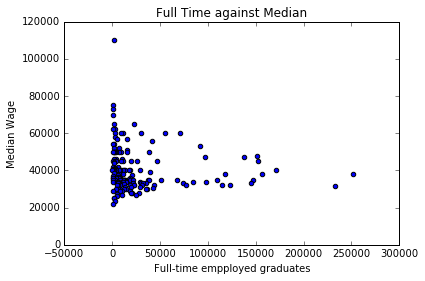

In [13]:
ax3 = recent_grads.plot(x='Full_time', y='Median', kind='scatter', title = 'Full Time against Median')
ax3.set_xlabel('Full-time empployed graduates')
ax3.set_ylabel('Median Wage')
plt.show()

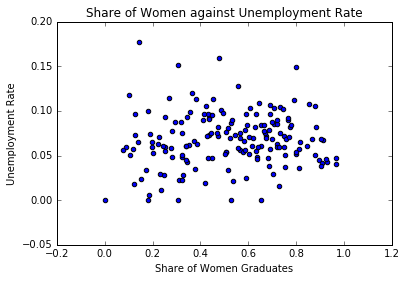

In [14]:
ax4 = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title = 'Share of Women against Unemployment Rate')
ax4.set_xlabel('Share of Women Graduates')
ax4.set_ylabel('Unemployment Rate')
plt.show()

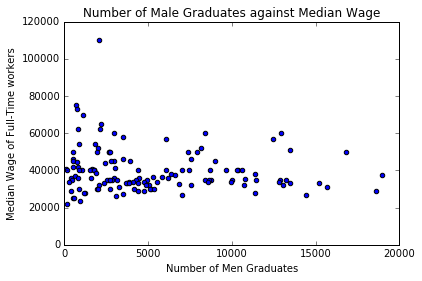

In [15]:
ax5 = recent_grads.plot(x='Men', y='Median', kind='scatter', title = 'Number of Male Graduates against Median Wage')
ax5.set_xlabel('Number of Men Graduates')
ax5.set_ylabel('Median Wage of Full-Time workers')
plt.xlim(0,20000)
plt.show()

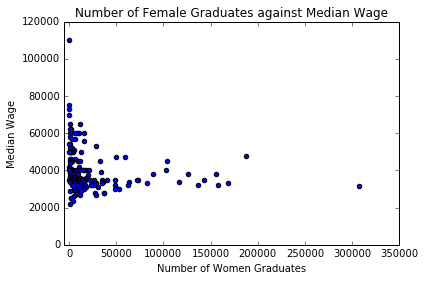

In [16]:
ax6 = recent_grads.plot(x='Women', y='Median', kind='scatter', title = 'Number of Female Graduates against Median Wage')
ax6.set_ylabel('Median Wage')
ax6.set_xlabel('Number of Women Graduates')
plt.xlim(-5000,350000)
plt.show()

We will do some initial exploration of he following questions, based on the scatter plots above:

#### Do students in more popular majors make more money? <br>

If this we're the case we would expect to see a relationship between sample size and median wage. However, there does not seem to be a clear/simple  relationship between the two factors.




#### Do students that majored in subjects that were majority female make more money?<br>

In order to investigate this question we want to make an additional plot of the median wage measured against the share of women in a subject.




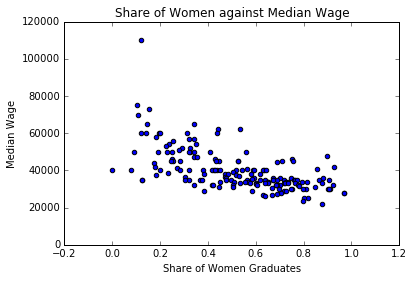

In [17]:
ax7 = recent_grads.plot(x='ShareWomen', y='Median', kind='scatter', title = 'Share of Women against Median Wage')
ax7.set_xlabel('Share of Women Graduates')
ax7.set_ylabel('Median Wage')
plt.show()

If anything, just looking at the graph, there may be an inverse relationship between the median wages and share of women in a subjects. That being said, the set of points seems to be quite horizontally scattered, to it is insufficient evidence from a visual analysis to make such statements. 

#### Is there any link between the number of full-time employees and median salary?

If there was relationship, would want to to see ra relationship between the 'Full Time against Median' graph, however we do not see a clear relationship, with only weak evidence (from a visual standopints) on a inverse relationship between the two. We see large clusters in lower-full time and lower- median wage. 

## Visualising the distributions of values

Now that we have visualies the data in 2 dimensions, presenting the data as scatter plots, we will be looking at the dsitribution of the data in histograms.

We will take a closer look at the distribution of the following columns:
 - Sample_size
 - Median
 - Employed
 - Full_time
 - ShareWomen
 - Unemployment_rate
 - Men
 - Women

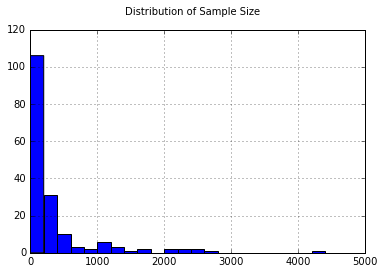

In [18]:
ax8 = recent_grads['Sample_size'].hist(bins=25, range=(0,5000))
plt.suptitle("Distribution of Sample Size")
plt.show()


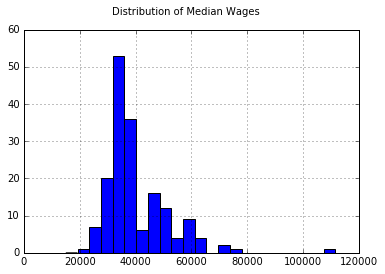

In [19]:
ax9 = recent_grads['Median'].hist(bins=25, range=(15000,120000))
plt.suptitle("Distribution of Median Wages")
plt.show()


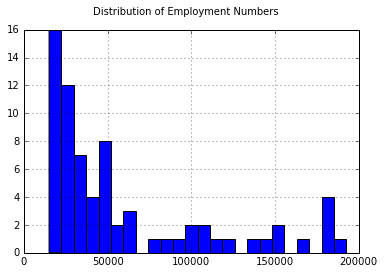

In [20]:
ax10 = recent_grads['Employed'].hist(bins=25, range=(15000,200000))
plt.suptitle("Distribution of Employment Numbers")
plt.show()


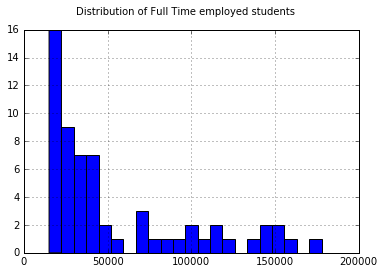

In [21]:
ax11 = recent_grads['Full_time'].hist(bins=25, range=(15000,200000))
plt.suptitle("Distribution of Full Time employed students")
plt.show()


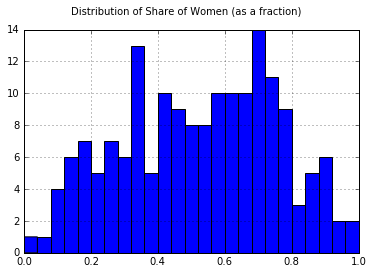

In [22]:
ax12 = recent_grads['ShareWomen'].hist(bins=25, range=(0,1))
plt.suptitle("Distribution of Share of Women (as a fraction)")
plt.show()

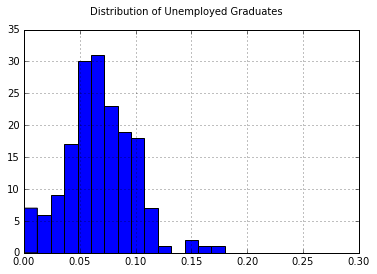

In [23]:
ax11 = recent_grads['Unemployment_rate'].hist(bins=25, range=(0,0.3))
plt.suptitle("Distribution of Unemployed Graduates")
plt.show()

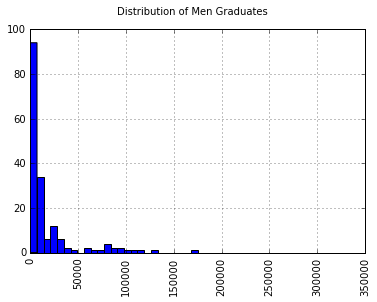

In [24]:
ax12 = recent_grads['Men'].hist(bins = 50, range=(0,350000))
plt.suptitle("Distribution of Men Graduates")
plt.xticks(rotation = 'vertical')
plt.show()

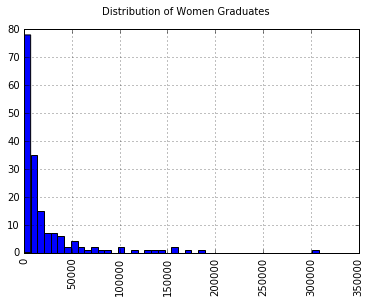

In [25]:
ax12 = recent_grads['Women'].hist(bins = 50, range=(0,350000))
plt.suptitle("Distribution of Women Graduates")
plt.xticks(rotation = 'vertical')
plt.show()

## Exploring scatter matrix plots
Now that we have generated the scatter plots and histograms, we will combine the two in order to visualise ther elationships between the two.

This can be achieved by two methods:
1. Setting up a figure with the relevant charts, and mapping them accoringly.
2. Utilise the pandas.pltting module and the *scatter_matrix* functionality within pandas.

The second options gives us a shorthand version of achieving the same reuslts, and so that is the method which we will be using. First we will have to import the relevant module.

In [26]:
from pandas.plotting import scatter_matrix

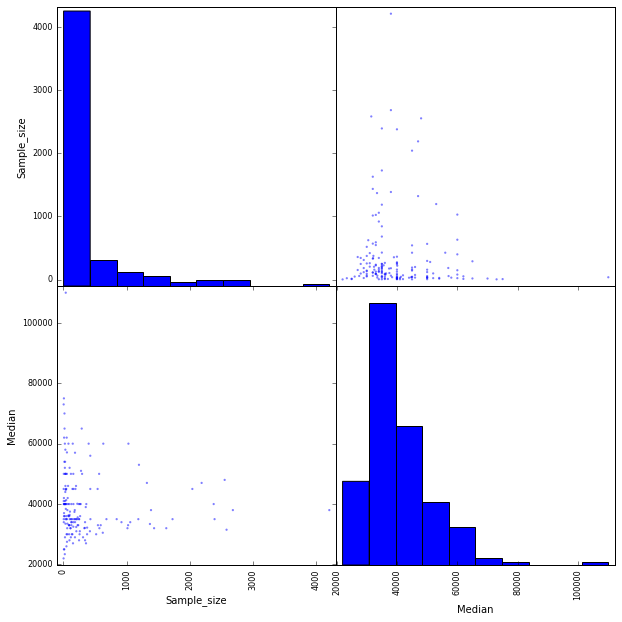

In [27]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize = (10,10))
plt.show()

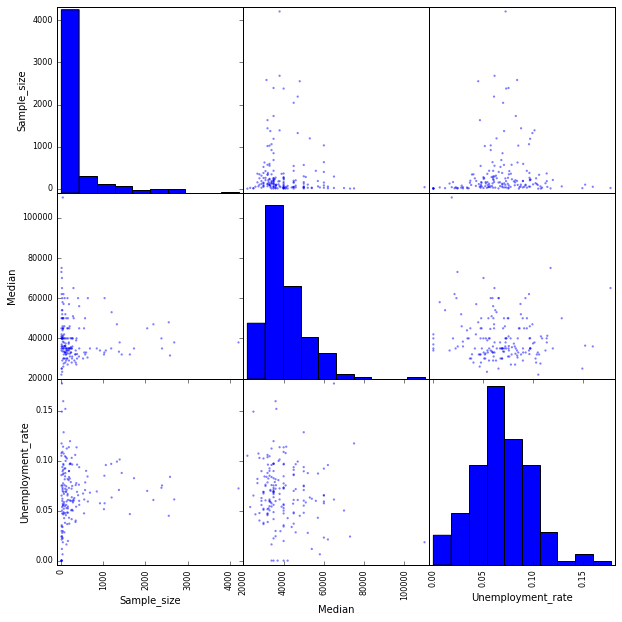

In [28]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize = (10,10))
plt.show()

Based on the scatter matrices  plot we will again take a look at the previous questions:

Do students in more popular majors make more money? <br>
Do students that majored in subjects that were majority female make more money?<br>

#### Do students in more popular majors make more money?

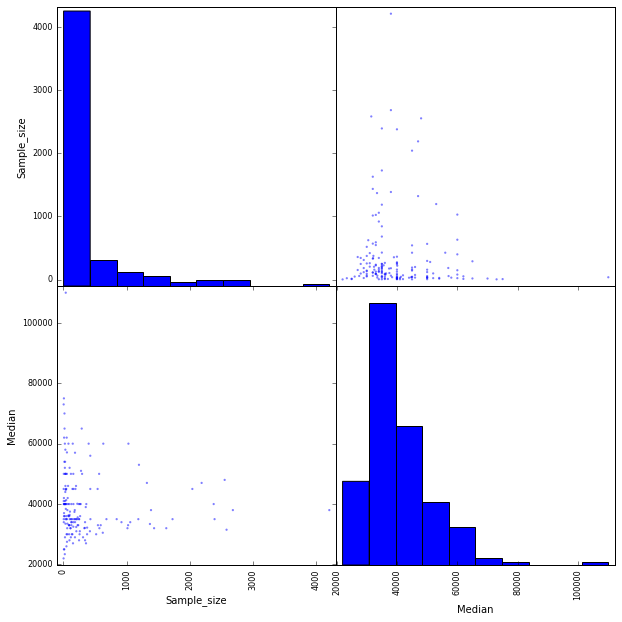

In [29]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize = (10,10))
plt.show()

The previous conclusion still hold, but we an now try and better comment about the the distribution of values, as related to the scatte plot.

We see that the the median salaries are most haevily clustered around the 30,000 - 50,000$ range. 

Our sample size is heavily weighed towards a small sample of around 50.



#### Do students that majored in subjects that were majority female make more money.

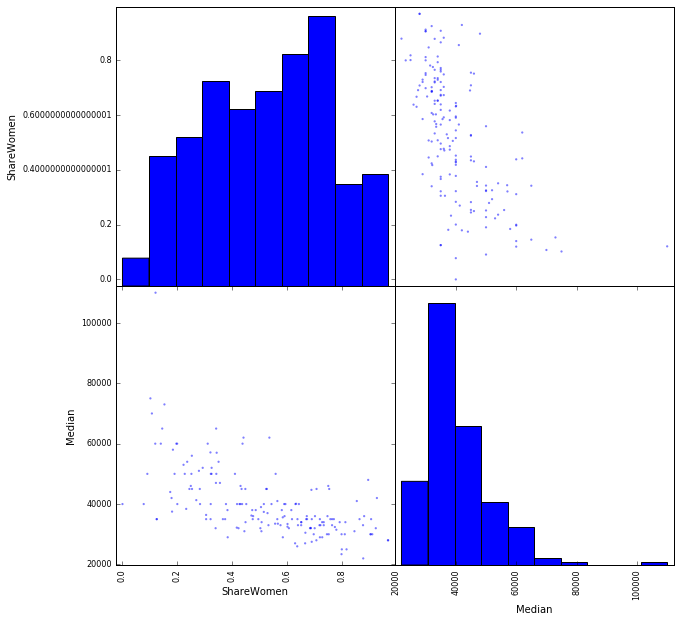

In [30]:
scatter_matrix(recent_grads[['ShareWomen', 'Median']], figsize = (10,10))
plt.show()

In terms of wages we see the there is a concentration of median wages around the 30,000  - 50,000 of wages. 

While the distribution of share of women subjects seems to be fairly uniform.

We can see that there is c ase to be made, that where there is a low share of women in subjects, there is a larger variance in median wages. 

## Exploring the bar plots to visualise the data

We will explore the the share degrees with the share of women on the graphs using bar plots.

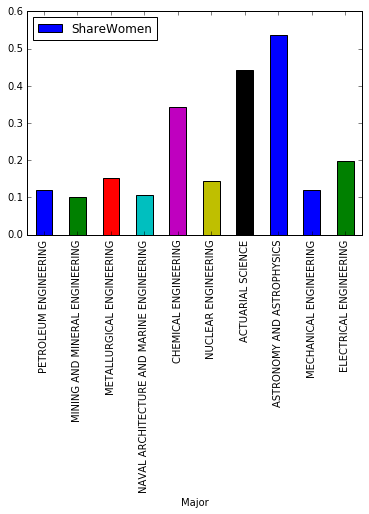

In [46]:
recent_grads[:10].plot.bar(x = 'Major', y = 'ShareWomen')
plt.show()

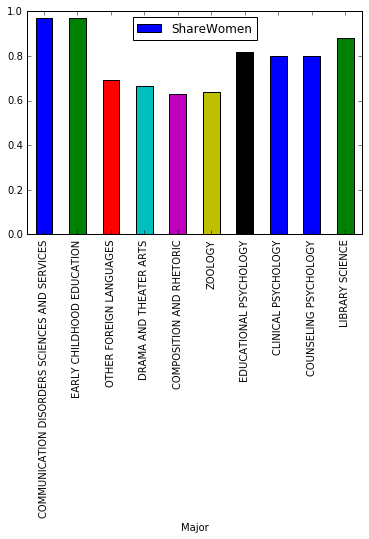

In [48]:
recent_grads[-10:].plot.bar(x = 'Major', y = 'ShareWomen')
plt.show()

# Further investigation into Major Categories


We will now turn our heads to understand the relationship between the Major Categories and Salaries in the database.

The Major category column contains string inputs, so we will look at the histogram to understand the dsitribution of these majors

In [60]:
recent_grads['Major_category'].describe()

count             172
unique             16
top       Engineering
freq               29
Name: Major_category, dtype: object

In [64]:
recent_grads['Major_category'].value_counts()

Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Physical Sciences                      10
Psychology & Social Work                9
Social Science                          9
Agriculture & Natural Resources         9
Arts                                    8
Industrial Arts & Consumer Services     7
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: Major_category, dtype: int64

In order to visualise this, we will take the average of median wages for each major category.

First we will create a dictionaryt of our key-alue pairs, computing the average median salaryt for each category



In [101]:
categories = recent_grads['Major_category'].unique()

In [102]:
mms_major_category = {}

for row in categories:
    mean_salary = recent_grads.loc[recent_grads['Major_category'] == row, 'Median'].mean()
    mms_major_category[row] = mean_salary

In [103]:
print(mms_major_category)

{'Health': 36825.0, 'Interdisciplinary': 35000.0, 'Communications & Journalism': 34500.0, 'Computers & Mathematics': 42745.454545454544, 'Agriculture & Natural Resources': 35111.11111111111, 'Arts': 33062.5, 'Law & Public Policy': 42200.0, 'Humanities & Liberal Arts': 31913.333333333332, 'Engineering': 57382.75862068965, 'Social Science': 37344.444444444445, 'Industrial Arts & Consumer Services': 36342.857142857145, 'Biology & Life Science': 36421.42857142857, 'Physical Sciences': 41890.0, 'Psychology & Social Work': 30100.0, 'Education': 32350.0, 'Business': 43538.46153846154}


In [136]:
# importing dict into a dataframe
salary_df = pd.DataFrame.from_dict(mms_major_category, orient ='index')
salary_df.columns = ['salary']
salary_df

,salary
Health,36825.000000
Interdisciplinary,35000.000000
Communications & Journalism,34500.000000
Computers & Mathematics,42745.454545
Agriculture & Natural Resources,35111.111111
Arts,33062.500000
Law & Public Policy,42200.000000
Humanities & Liberal Arts,31913.333333
Engineering,57382.758621
Social Science,37344.444444


We will now plot this using matplotlib libraries, and sorting the values


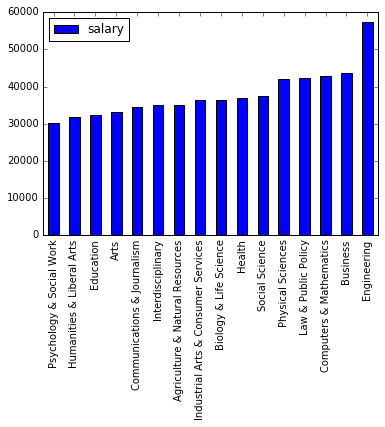

In [135]:
salary_df.sort_values(by = 'salary').plot.bar()
plt.show()

We can see that many STEM subjects top the median salary averages such as Engineeering (which is clearly the highest around the 60k range), Computer & Mathematics, Physical Sciences. But we also see that Business as well as Law & Public policy are among the top salary avereages for categories of degrees.

# Hex Bins to explore share of Women and Unemployment

We have previously looked at the Share of women as measured against unemployment on the scatter plot, but we did not see a clear linear relationship. Instead, we will use a hex bin plot in order to see if there are any clusters of any tuple value ranges.

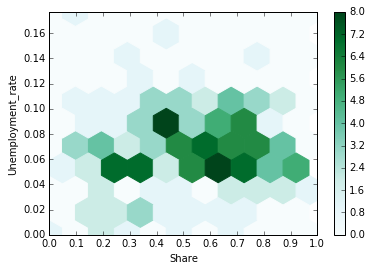

In [158]:
ax15 = recent_grads.plot.hexbin(x='ShareWomen', y='Unemployment_rate',gridsize = 10, sharex = False)
ax15.set_xlabel('Share')
ax15.set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.show()

We can see that there are concentrations of values around (0.45 , 0.09) and region centered around (0.65 , 0.05).

Overall there is more datapoints in the region where the share of women is >40%, and unemplotment rate is between 0.04 and 0.12.

There is also a concentrated range of valuies between x = [0.2, 0.4] and y = [0.04 - 0.06].